In [1]:
import pandas as pd
data_path = "../../data/"

In [2]:
read = False
if read:
    fips_codes = pd.read_csv(data_path + "census_code_mappers/fips_codes.csv")
    percent_cover_county = pd.read_csv(data_path + "greenspace_data/percent_cover_county.txt", sep = ",")
    urban_tree_canopy = pd.read_csv(data_path + "greenspace_data/urban_tree_canopy.csv")
    trees_us = pd.read_csv(data_path + "greenspace_data/5_million_trees_us_cities.csv")
# percent_cover_county
# urban_tree_canopy

cehi_inputs

In [3]:
cehi_inputs = pd.read_csv(data_path + "greenspace_data/cehi_inputs.csv")
cehi_ouputs = pd.read_csv(data_path + "greenspace_data/cehi_outputs.csv")

In [4]:
print(cehi_inputs.columns)

print((cehi_inputs.bgrp != cehi_inputs.GEOID10).sum())
del cehi_inputs["bgrp"]
del cehi_inputs["OBJECTID"] # same as index

print(cehi_inputs.columns)


print(cehi_ouputs.columns)

cehi_ouputs.rename(columns={cehi_ouputs.columns[0]: 'GEOID10'}, inplace=True)
cehi_ouputs.rename(columns={cehi_ouputs.columns[1]: 'enviro_atlas_community_abbr'}, inplace=True)
cols = cehi_ouputs.columns.tolist()
for c in cols:
    cehi_ouputs = cehi_ouputs.rename(columns={c: c.strip()})
print((cehi_ouputs.Objects != cehi_ouputs.GEOID10).sum())
del cehi_ouputs["Objects"]

print(cehi_ouputs.columns)

Index(['OBJECTID', 'bgrp', 'GEOID10', 'enviro_atlas_community_abbr',
       'avg_temp_reduction_tree_cover', 'annual_percent_runoff_reduction',
       'high_speed_street_bordered_tree_buffer', 'percent_residents_near_park',
       'percent_pm10_removed_trees', 'percent_tree_view',
       'percent_greenery_walkable_streets', 'NID', 'city_state'],
      dtype='object')
0
Index(['GEOID10', 'enviro_atlas_community_abbr',
       'avg_temp_reduction_tree_cover', 'annual_percent_runoff_reduction',
       'high_speed_street_bordered_tree_buffer', 'percent_residents_near_park',
       'percent_pm10_removed_trees', 'percent_tree_view',
       'percent_greenery_walkable_streets', 'NID', 'city_state'],
      dtype='object')
Index(['ï»¿GEOID', 'Comm', 'Objects', ' DwIndW', ' DwNIndW', ' DwAvgW2',
       ' DwNAvgW2'],
      dtype='object')
0
Index(['GEOID10', 'enviro_atlas_community_abbr', 'DwIndW', 'DwNIndW',
       'DwAvgW2', 'DwNAvgW2'],
      dtype='object')


In [5]:
#get dataset summary
cehi_inputs.info()
# cehi_inputs.describe()
cehi_inputs.city_state.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27856 entries, 0 to 27855
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   GEOID10                                 27856 non-null  int64  
 1   enviro_atlas_community_abbr             27856 non-null  object 
 2   avg_temp_reduction_tree_cover           27856 non-null  float64
 3   annual_percent_runoff_reduction         27856 non-null  float64
 4   high_speed_street_bordered_tree_buffer  27779 non-null  float64
 5   percent_residents_near_park             27856 non-null  float64
 6   percent_pm10_removed_trees              27856 non-null  float64
 7   percent_tree_view                       27778 non-null  float64
 8   percent_greenery_walkable_streets       27856 non-null  float64
 9   NID                                     27856 non-null  float64
 10  city_state                              27856 non-null  ob

array(['Austin, TX', 'Birmingham, AL', 'Baltimore, MD', 'Brownsville, TX',
       'Chicago, IL', 'Cleveland, OH', 'Des Moines, IA', 'Durham, NC',
       'Fresno, CA', 'Green Bay, WI', 'Minneapolis/St. Paul, MN',
       'Memphis, TN', 'Milwaukie, WI', 'New Bedford, MA', 'New Haven, CT',
       'New York, NY', 'Pittsburgh, PA', 'Portland, ME', 'Paterson, NJ',
       'Portland, OR', 'Tampa, FL', 'Virginia Beach/Williamsburg, VA'],
      dtype=object)

array([[<AxesSubplot: title={'center': 'GEOID10'}>,
        <AxesSubplot: title={'center': 'avg_temp_reduction_tree_cover'}>,
        <AxesSubplot: title={'center': 'annual_percent_runoff_reduction'}>],
       [<AxesSubplot: title={'center': 'high_speed_street_bordered_tree_buffer'}>,
        <AxesSubplot: title={'center': 'percent_residents_near_park'}>,
        <AxesSubplot: title={'center': 'percent_pm10_removed_trees'}>],
       [<AxesSubplot: title={'center': 'percent_tree_view'}>,
        <AxesSubplot: title={'center': 'percent_greenery_walkable_streets'}>,
        <AxesSubplot: title={'center': 'NID'}>]], dtype=object)

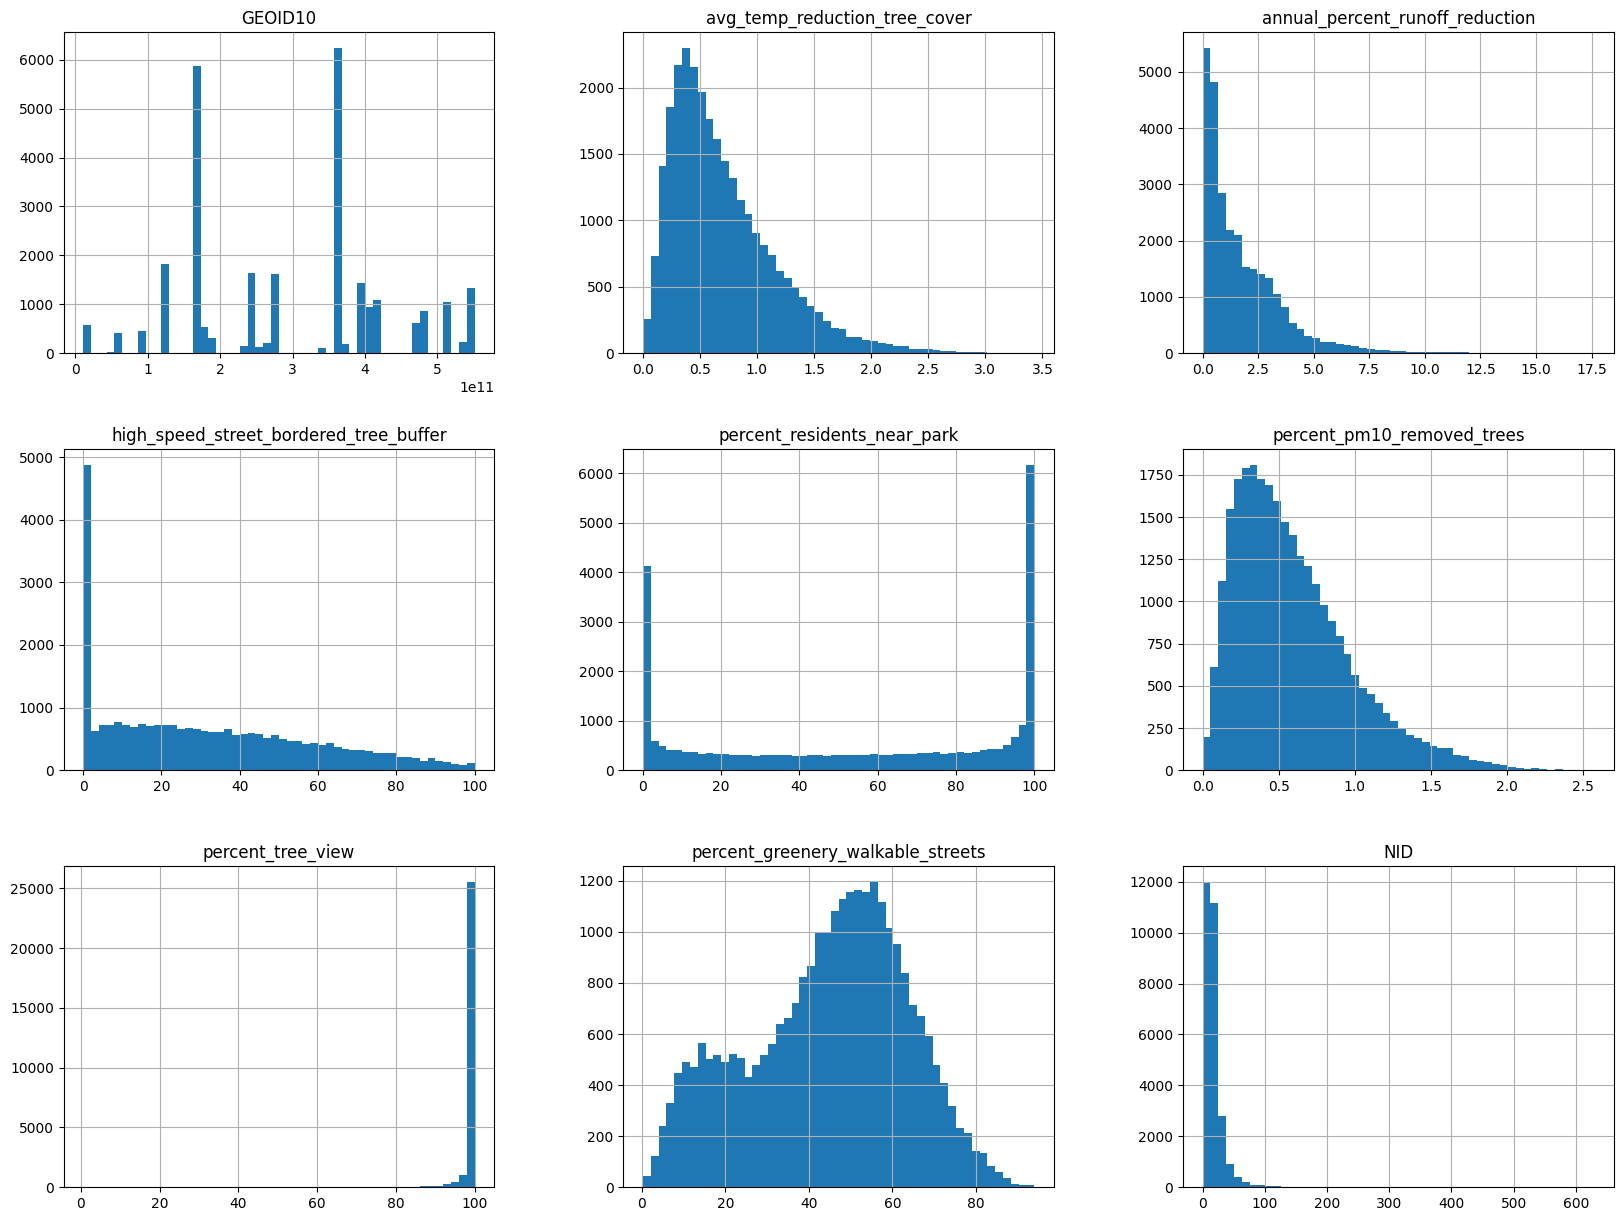

In [6]:
#get histograms
cehi_inputs.hist(bins=50, figsize=(20,15))

<AxesSubplot: >

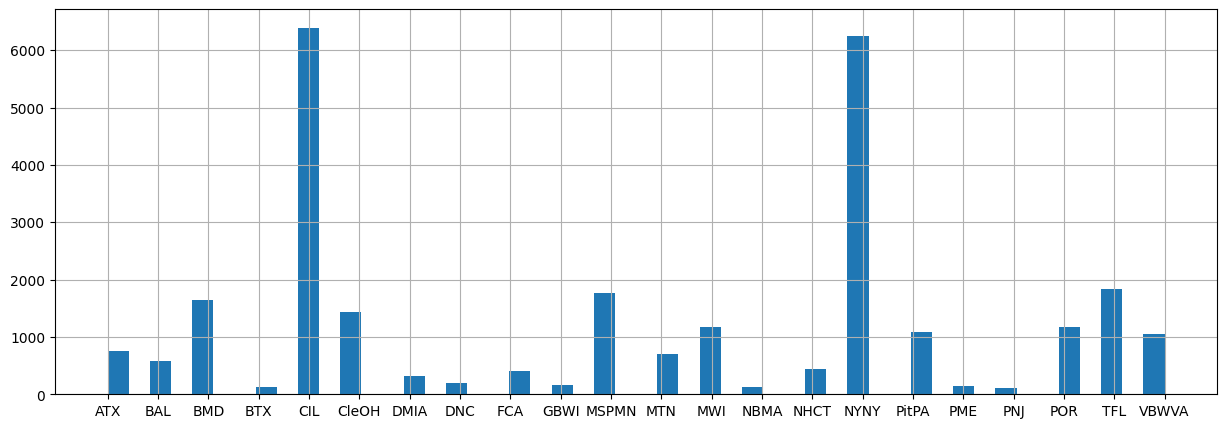

In [7]:
#plot histogram
cehi_inputs.enviro_atlas_community_abbr.hist(bins=50, figsize=(15,5))

<AxesSubplot: >

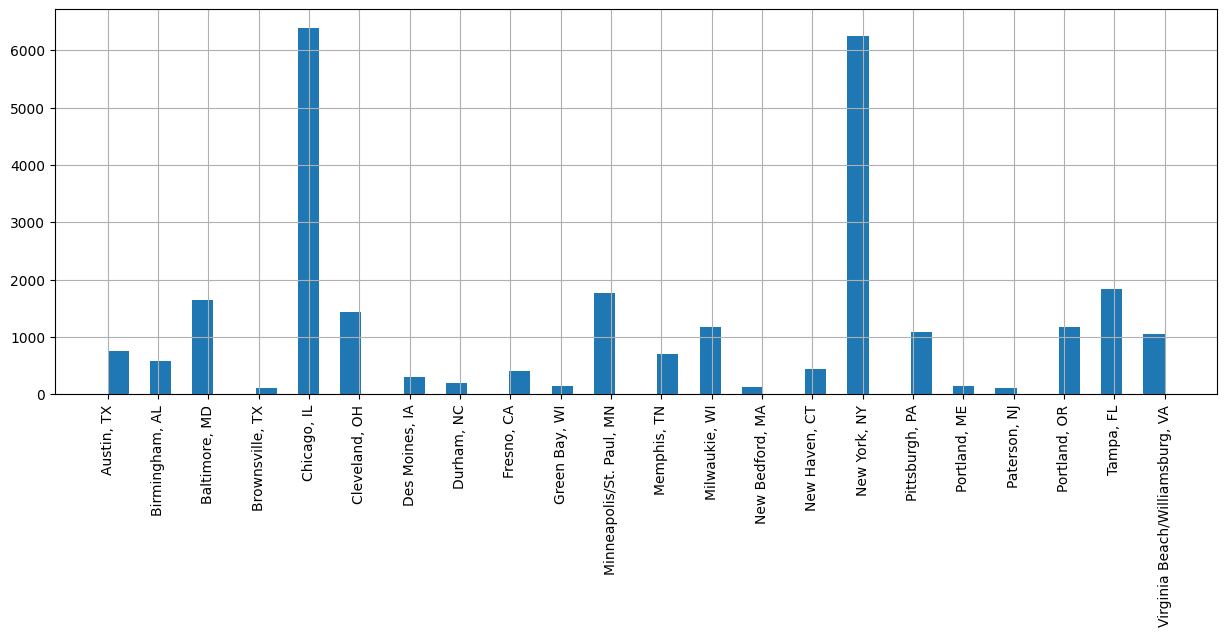

In [8]:
#plot histogram
import matplotlib.pyplot as plt
plt.xticks(rotation=90)
cehi_inputs.city_state.hist(bins=50, figsize=(15,5))

In [9]:
#check for repeated values
cehi_inputs.GEOID10.value_counts().max()

1

cehi_outputs

In [10]:
#get summary
cehi_ouputs.info()
# cehi_ouputs.describe()
cehi_ouputs.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27778 entries, 0 to 27777
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   GEOID10                      27778 non-null  int64  
 1   enviro_atlas_community_abbr  27778 non-null  object 
 2   DwIndW                       27778 non-null  float64
 3   DwNIndW                      27778 non-null  float64
 4   DwAvgW2                      27778 non-null  float64
 5   DwNAvgW2                     27778 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.3+ MB


Index(['GEOID10', 'enviro_atlas_community_abbr', 'DwIndW', 'DwNIndW',
       'DwAvgW2', 'DwNAvgW2'],
      dtype='object')

array([[<AxesSubplot: title={'center': 'GEOID10'}>,
        <AxesSubplot: title={'center': 'DwIndW'}>],
       [<AxesSubplot: title={'center': 'DwNIndW'}>,
        <AxesSubplot: title={'center': 'DwAvgW2'}>],
       [<AxesSubplot: title={'center': 'DwNAvgW2'}>, <AxesSubplot: >]],
      dtype=object)

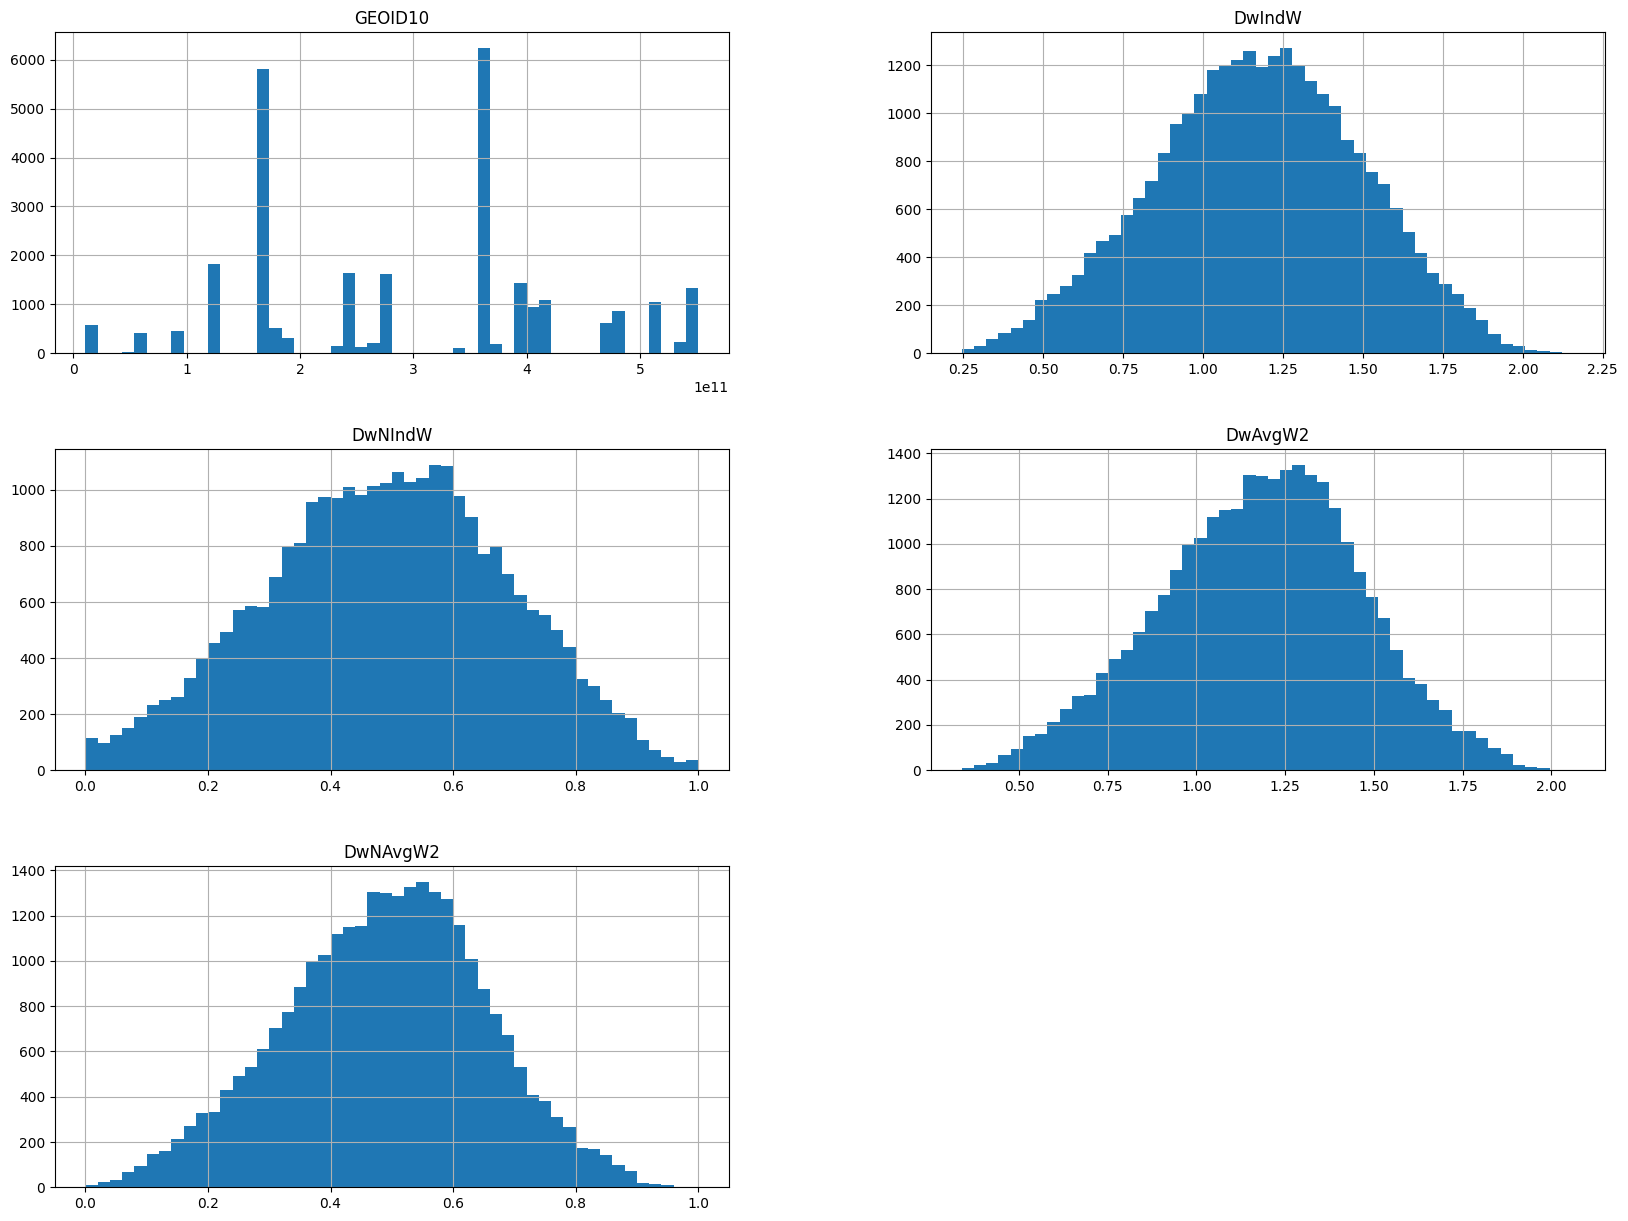

In [11]:
cehi_ouputs.hist(bins=50, figsize=(20,15))

<AxesSubplot: >

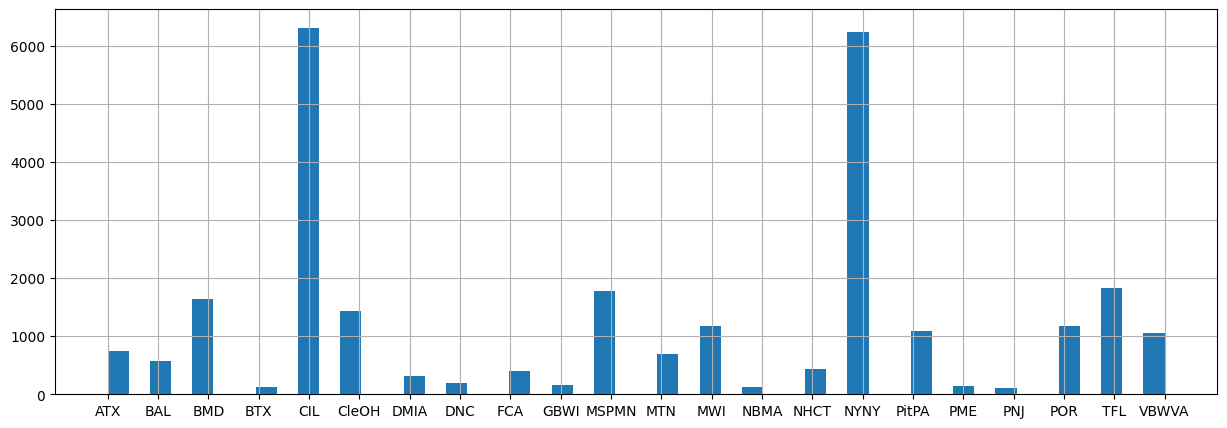

In [12]:
cehi_ouputs.enviro_atlas_community_abbr.hist(bins=50, figsize=(15,5))

In [13]:
cehi_ouputs.GEOID10.value_counts().max()

1

In [14]:
#merge datasets
cehi_merged = pd.merge(cehi_inputs, cehi_ouputs, on=['GEOID10', 'enviro_atlas_community_abbr'], how='inner')

In [15]:
cehi_merged.info()
cehi_merged.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27776 entries, 0 to 27775
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   GEOID10                                 27776 non-null  int64  
 1   enviro_atlas_community_abbr             27776 non-null  object 
 2   avg_temp_reduction_tree_cover           27776 non-null  float64
 3   annual_percent_runoff_reduction         27776 non-null  float64
 4   high_speed_street_bordered_tree_buffer  27776 non-null  float64
 5   percent_residents_near_park             27776 non-null  float64
 6   percent_pm10_removed_trees              27776 non-null  float64
 7   percent_tree_view                       27776 non-null  float64
 8   percent_greenery_walkable_streets       27776 non-null  float64
 9   NID                                     27776 non-null  float64
 10  city_state                              27776 non-null  ob

Index(['GEOID10', 'enviro_atlas_community_abbr',
       'avg_temp_reduction_tree_cover', 'annual_percent_runoff_reduction',
       'high_speed_street_bordered_tree_buffer', 'percent_residents_near_park',
       'percent_pm10_removed_trees', 'percent_tree_view',
       'percent_greenery_walkable_streets', 'NID', 'city_state', 'DwIndW',
       'DwNIndW', 'DwAvgW2', 'DwNAvgW2'],
      dtype='object')

array([[<AxesSubplot: title={'center': 'GEOID10'}>,
        <AxesSubplot: title={'center': 'avg_temp_reduction_tree_cover'}>,
        <AxesSubplot: title={'center': 'annual_percent_runoff_reduction'}>,
        <AxesSubplot: title={'center': 'high_speed_street_bordered_tree_buffer'}>],
       [<AxesSubplot: title={'center': 'percent_residents_near_park'}>,
        <AxesSubplot: title={'center': 'percent_pm10_removed_trees'}>,
        <AxesSubplot: title={'center': 'percent_tree_view'}>,
        <AxesSubplot: title={'center': 'percent_greenery_walkable_streets'}>],
       [<AxesSubplot: title={'center': 'NID'}>,
        <AxesSubplot: title={'center': 'DwIndW'}>,
        <AxesSubplot: title={'center': 'DwNIndW'}>,
        <AxesSubplot: title={'center': 'DwAvgW2'}>],
       [<AxesSubplot: title={'center': 'DwNAvgW2'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

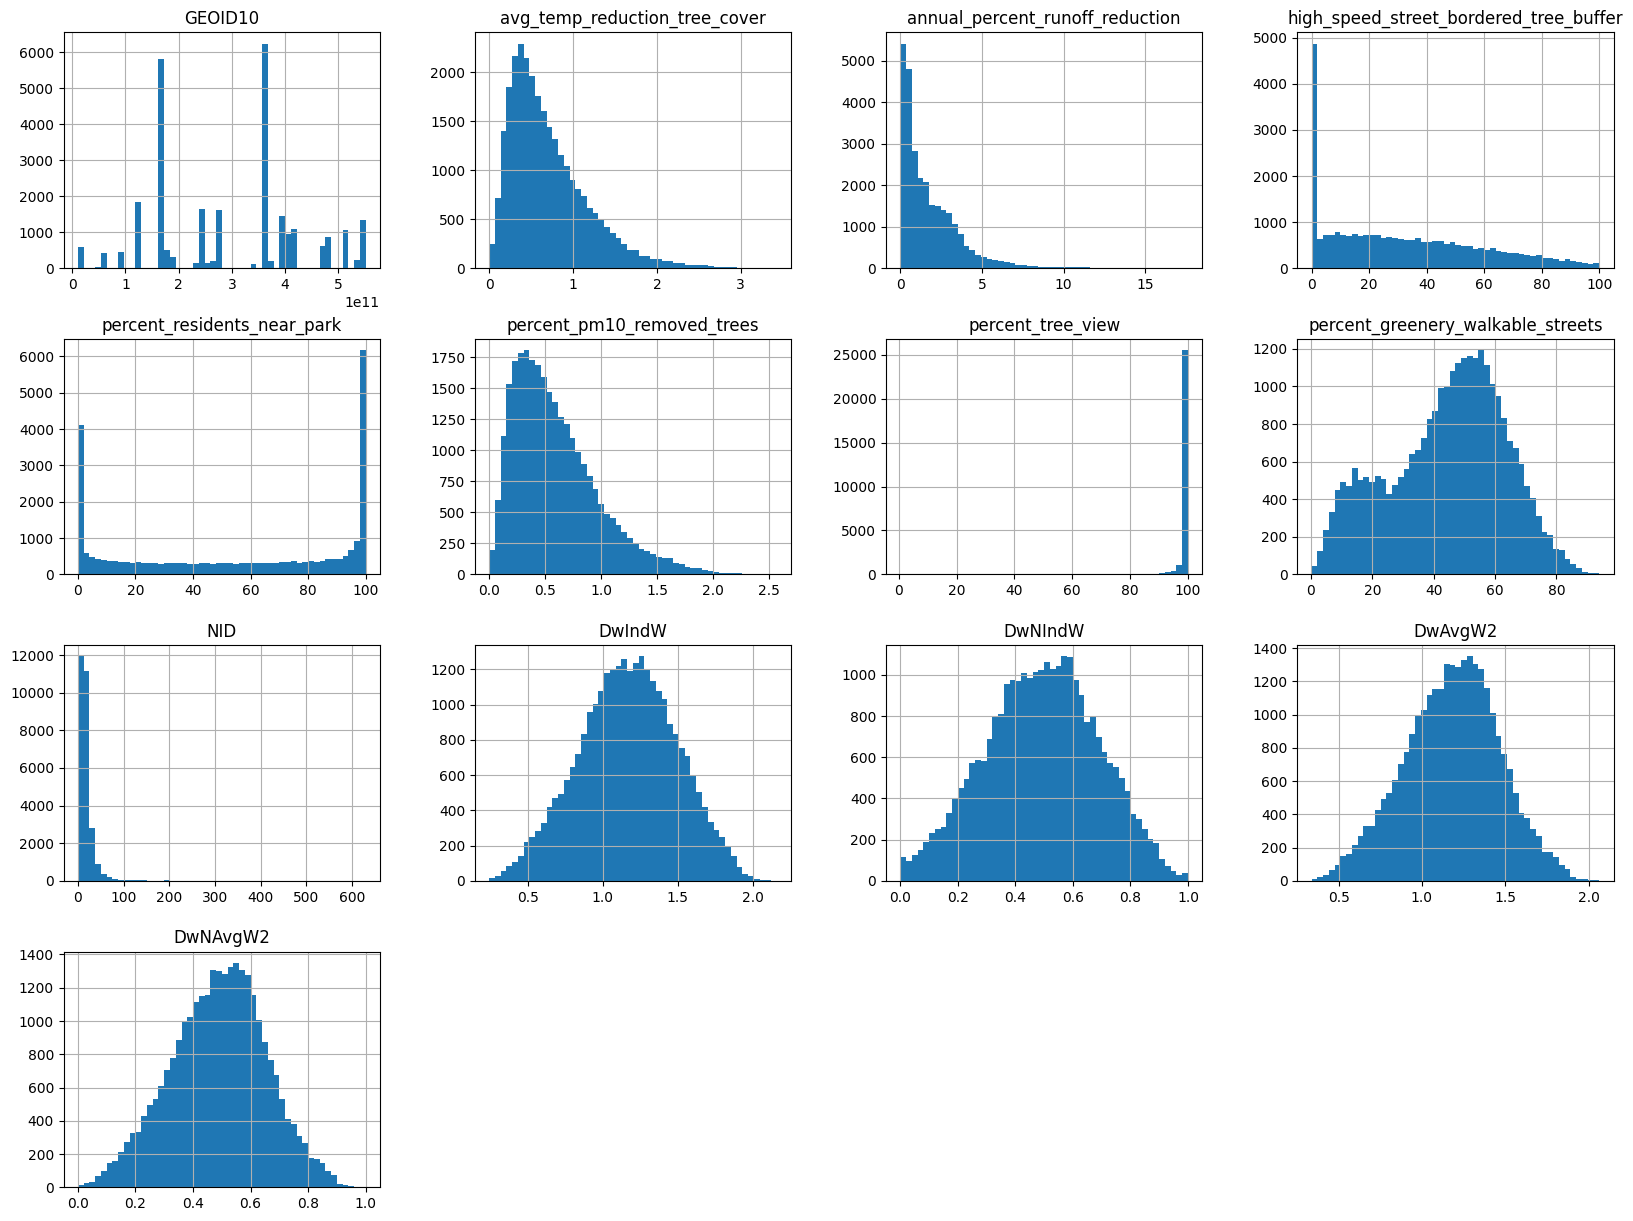

In [16]:
cehi_merged.hist(bins=50, figsize=(20,15))

In [18]:
# save all data
cehi_inputs.to_csv(data_path + "greenspace_data/cehi_inputs_cleaned.csv")
cehi_ouputs.to_csv(data_path + "greenspace_data/cehi_outputs_cleaned.csv")
cehi_merged.to_csv(data_path + "greenspace_data/cehi_merged.csv")